In [35]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [36]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [37]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
#from flask import Flask, jsonify

In [38]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [39]:
# reflect an existing database into a new model
#Base = automap_base()
# reflect the tables
#Base.prepare(engine, reflect=True)
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [40]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [41]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [42]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [43]:
#New code - inspector
inspector=inspect(engine)

In [44]:
#Station tabl
stations=engine.execute('SELECT * FROM Station')
print(stations.keys())

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [45]:
stations.fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [46]:
columns=inspector.get_columns('Station')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [47]:
#Measurement tabl
measurement=engine.execute('SELECT * FROM Measurement')
print(measurement.keys())

['id', 'station', 'date', 'prcp', 'tobs']


In [48]:
#measurement=engine.execute('SELECT date FROM Measurement').fetchall()
#for row in measurement:
 #   print(row)

#print(measurement.keys())

In [49]:
measurement.fetchall()

397', '2011-10-05', None, 79.0),
 (588, 'USC00519397', '2011-10-06', 0.0, 75.0),
 (589, 'USC00519397', '2011-10-07', 0.03, 78.0),
 (590, 'USC00519397', '2011-10-08', 0.0, 79.0),
 (591, 'USC00519397', '2011-10-09', 0.0, 78.0),
 (592, 'USC00519397', '2011-10-10', 0.02, 77.0),
 (593, 'USC00519397', '2011-10-11', 0.03, 78.0),
 (594, 'USC00519397', '2011-10-12', 0.0, 77.0),
 (595, 'USC00519397', '2011-10-13', 0.0, 77.0),
 (596, 'USC00519397', '2011-10-14', 0.03, 78.0),
 (597, 'USC00519397', '2011-10-15', 0.02, 77.0),
 (598, 'USC00519397', '2011-10-16', 0.0, 76.0),
 (599, 'USC00519397', '2011-10-17', 0.02, 77.0),
 (600, 'USC00519397', '2011-10-18', 0.01, 76.0),
 (601, 'USC00519397', '2011-10-19', 0.0, 74.0),
 (602, 'USC00519397', '2011-10-20', 0.0, 78.0),
 (603, 'USC00519397', '2011-10-21', 0.0, 76.0),
 (604, 'USC00519397', '2011-10-22', 0.0, 77.0),
 (605, 'USC00519397', '2011-10-23', 0.0, 75.0),
 (606, 'USC00519397', '2011-10-24', 0.14, 74.0),
 (607, 'USC00519397', '2011-10-25', 1.6, 77.0),

In [50]:
columns=inspector.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [51]:
recent_date=(session.query(Measurement.date)
    .order_by(Measurement.date.desc())
    .first())

recent_date

('2017-08-23')

Query Date: 2016-08-22


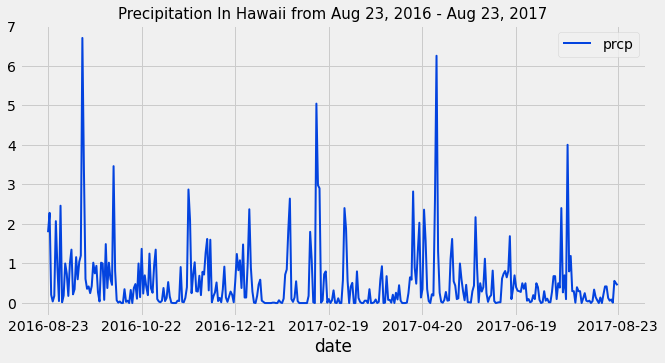

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago_date=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', year_ago_date)
# Perform a query to retrieve the data and precipitation scores
year_prcp=(session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > year_ago_date)
                  .group_by(Measurement.date)
                  .all())
#year_prcp

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df=pd.DataFrame(year_prcp, columns=['date', 'prcp'])
prcp_df.set_index('date',inplace=True)
#prcp_df.head(15)

# Sort the dataframe by date
prcp_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

plt.rcParams['figure.figsize']=(10,5)
prcp_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365),
             color='xkcd:blue')


plt.title('Precipitation In Hawaii from Aug 23, 2016 - Aug 23, 2017',fontsize=15)

plt.show()


In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number stations in the dataset
total_number_stations=session.query(Station).count()
print({total_number_stations})

{9}


In [70]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [73]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tobs=[Measurement.station, 
             func.min(Measurement.tobs), 
             func.max(Measurement.tobs), 
             func.avg(Measurement.tobs)]

most_active_st=(session.query(*tobs)
                       .filter(Measurement.station=='USC00519281')
                       .all())
most_active_st

most_active_st_temp=pd.DataFrame(most_active_st, columns=['station', 'min_temp', 
                                                         'max_temp', 'avg_temp'])
most_active_st_temp.set_index('station', inplace=True)
most_active_st_temp



,min_temp,max_temp,avg_temp
station,,,
USC00519281,54.0,85.0,71.663781


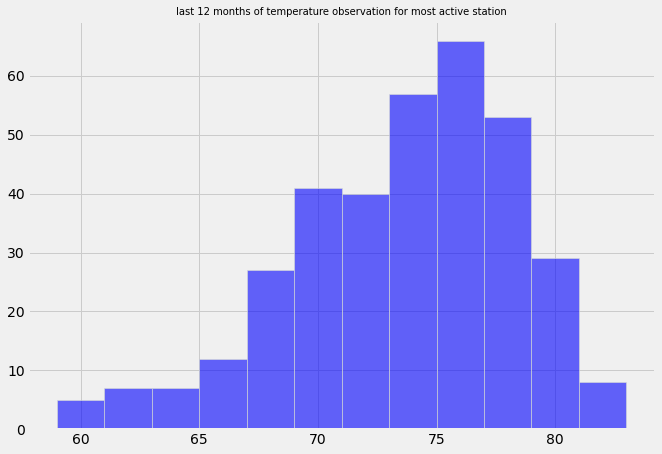

In [80]:
# Using the most active station id
year_tobs=(session.query(Measurement.date,(Measurement.tobs))
                  .filter(func.strftime(Measurement.date) > year_ago_date)
                  .filter(Measurement.station=='USC00519281')
                  .all())
#year_tobs

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_df=pd.DataFrame(year_tobs)
tobs_df.set_index('date',inplace=True)

plt.rcParams['figure.figsize']=(10,7)
plt.hist(tobs_df['tobs'],bins=12,alpha=0.6,edgecolor='xkcd:light gray',
         linewidth=1,color='blue')

plt.title('last 12 months of temperature observation for most active station',fontsize=10)


plt.show()


# Close session

In [81]:
# Close Session
session.close()